# About

We realized that the shapes are different between subjects. Therefore, to normalize differences, we will automatically change intervals while taking slices.<br/>
First in this notebook we'll present the differences between shapes.

File sizes : Shape
* 43.5mb : (256, 256, 166)
* 23.6mb : (192, 192, 160)
* 47.2mb : (256, 256, 180)

In [1]:
import nibabel as nib
from nibabel.testing import data_path

import os
from pathlib import Path 

import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
class helper:
    def __init__(self):
        return
    

    def read_image(self, img_path):
        return nib.load(os.path.join(data_path, img_path)).get_fdata()
    

    def show_img(self, axis, sliceA, sliceB, img_path): 
        '''
            axis type -> axial, sagital or coronal,
            sliceA -> start point, 
            sliceB -> end point,
            n -> slice count
        '''
        img = self.read_image(img_path)                 
        print(f"Shape: {img.shape}")
        n = sliceB - sliceA

        # setting values to rows and column variables
        rows = int(np.ceil(np.sqrt(n)+1))
        cols = int(np.ceil(np.sqrt(n)))

        if(cols > 2):
            col_size = n * 1.25
            row_size = n * 2
        else:
            col_size = n * 1.5
            row_size = n * 3.2

        if axis == "axial":
            plot = figure(figsize=(col_size, row_size), dpi=77)
            for i in range(n):
                ax = plot.add_subplot(rows, cols, i + 1)
                ax.set_title(f'{sliceA + i}. Slice', fontsize= 11)
                ax.imshow(img[sliceA + i,:,:], cmap='gray')

        elif axis == "sagittal":
            plot = figure(figsize=(col_size, row_size), dpi=77)
            for i in range(n):
                ax = plot.add_subplot(rows, cols, i + 1)
                ax.set_title(f'{sliceA + i}. Slice', fontsize= 11)
                ax.imshow(img[:,:,sliceA + i], cmap='gray')

        elif axis == "coronal":
            plot = figure(figsize=(col_size, row_size), dpi=77)
            for i in range(n):
                ax = plot.add_subplot(rows, cols, i + 1)
                ax.set_title(f'{sliceA + i}. Slice', fontsize= 11)
                ax.imshow(img[:,sliceA + i,:], cmap='gray')
        
        else:    print("Wrong axis type!")
        plt.savefig(f'/Users/toygar/Desktop/Bitirme/data/figures/{axis}_{sliceA}_to_{sliceB}.pdf', bbox_inches="tight",
                pad_inches=0.3, transparent=False)
        plt.show()

In [3]:
h = helper()

In [4]:
path = '/Users/toygar/Desktop/Bitirme/data/'

In [5]:
type1 = f'{path}ADNI/136_S_0426/MPR__GradWarp__B1_Correction__N3__Scaled/2006-05-16_15_51_24.0/I40356/ADNI_136_S_0426_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070215211810806_S14581_I40356.nii'
type2 = f'{path}ADNI/099_S_1144/MPR__GradWarp__B1_Correction__N3__Scaled/2007-08-10_13_44_12.0/I79241/ADNI_099_S_1144_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20071028202645607_S37181_I79241.nii'
type3 = f'{path}ADNI/021_S_1109/MPR__GradWarp__N3__Scaled/2006-12-05_14_24_09.0/I62695/ADNI_021_S_1109_MR_MPR__GradWarp__N3__Scaled_Br_20070727185946236_S23446_I62695.nii'

Shape: (256, 256, 166)


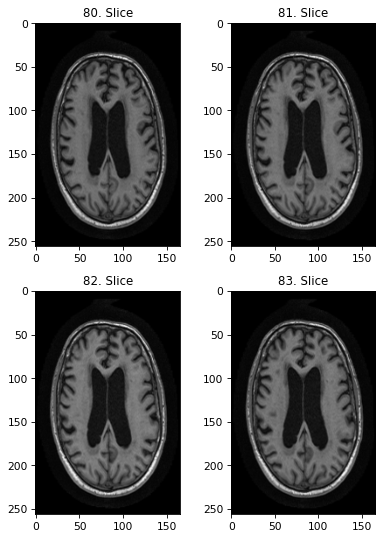

In [6]:
h.show_img('axial', 80, 84, type1)

Shape: (192, 192, 160)


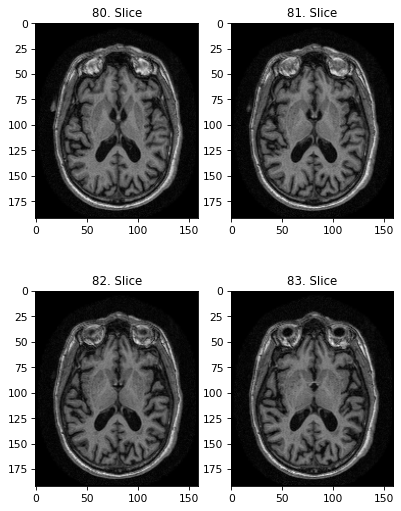

In [7]:
h.show_img('axial', 80, 84, type2)

Shape: (256, 256, 180)


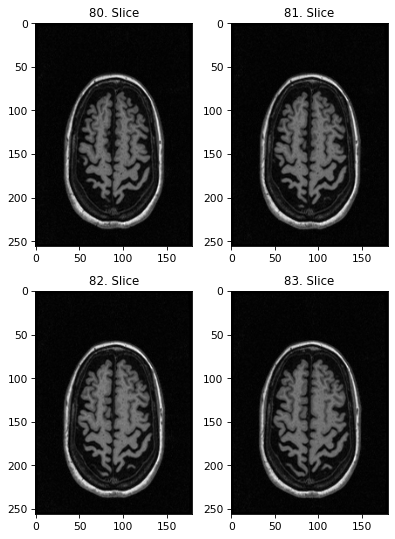

In [8]:
h.show_img('axial', 80, 84, type3)